In [14]:
import csv
import numpy as np
import pandas as pd
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import requests 
from pprint import pprint
from citipy import citipy
#API Key
from config import APIKey


In [17]:
lat = np.random.uniform(-90,90,500)
lng = np.random.uniform(-180, 180, 500)
print(lat)
print(lng)

[-1.12650681e+01 -5.49205916e+00 -7.41641519e+01 -5.71079005e+01
 -8.16983648e+01  1.28719910e+01 -7.13260939e+01 -3.63088999e+01
 -3.81093076e+01 -6.45627988e+01 -5.52989737e+01  1.36223324e+00
 -2.84201319e+01 -6.56995860e+01 -4.03880442e+00 -3.85024203e+01
 -3.85900076e+00  5.44715539e+01 -3.74355713e+01 -8.82953650e+01
 -7.82279664e+01  2.06334872e+01  6.37044503e+01  7.02214640e+01
 -8.92393911e+01  5.74175815e+00  4.70391825e+01 -3.92335787e+01
 -4.78895513e+01  4.33688622e+01 -3.87664522e+00 -3.96098850e+01
  5.47666229e+01  3.78262285e+01  3.66094614e+01  4.84629113e+01
 -2.21487675e+01  2.51612126e+01  7.22078739e+01 -2.95752057e+01
 -2.89247404e+01 -6.97004787e+01  8.85417319e+01  2.90126773e+01
  4.95865697e+01 -6.28466698e+01 -4.69366062e+01  4.02373738e+01
 -8.66828894e+00  7.92473674e+01  4.23181384e+01 -4.04930187e+01
  3.10133612e+01 -8.06567779e+01  8.04722688e+00 -5.28976511e+00
 -8.13102386e+01 -1.26698002e+01  5.06750825e+01  2.09041879e+01
  5.90655277e+01 -3.22957

In [18]:
cities_df = pd.DataFrame({"lat": lat, 
                          "lng": lng, 
                          "City": "", 
                          "Country": "", 
                          "Temp": "",
                          "Cloudiness": "", 
                          "Humidity": "", 
                          "Wind Speed": "", "URL": ""})
cities_df  

,City,Cloudiness,Country,Humidity,Temp,URL,Wind Speed,lat,lng
0,,,,,,,,-11.265068,-34.946921
1,,,,,,,,-5.492059,-69.969487
2,,,,,,,,-74.164152,83.856681
3,,,,,,,,-57.107900,138.574520
4,,,,,,,,-81.698365,61.883830
5,,,,,,,,12.871991,95.764899
6,,,,,,,,-71.326094,29.737481
7,,,,,,,,-36.308900,113.506998
8,,,,,,,,-38.109308,174.792981
9,,,,,,,,-64.562799,173.031592


In [24]:
for i, j in cities_df.iterrows():
    lat = j['lat']
    lng = j['lng']
    cities_df.set_value(i, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(i, "Country", citipy.nearest_city(lat, lng).country_code)
cities_df.head()

/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,City,Country,lng,lat,Temp,Humidity,Cloudiness,Wind Speed,URL
0,coruripe,br,-34.946921,-11.265068,80.71,97,80,11.65,http://api.openweathermap.org/data/2.5/weather...
1,jutai,br,-69.969487,-5.492059,73.33,100,92,1.7,http://api.openweathermap.org/data/2.5/weather...
2,busselton,au,83.856681,-74.164152,68.2,100,0,11.43,http://api.openweathermap.org/data/2.5/weather...
3,new norfolk,au,138.574520,-57.107900,64.4,48,75,17.22,http://api.openweathermap.org/data/2.5/weather...
4,taolanaro,mg,61.883830,-81.698365,No Data Avaiable,No Data Avaiable,No Data Avaiable,No Data Avaiable,No Data Avaiable


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
settings = {"units": "imperial", "appid": APIKey}

In [26]:
for i, j in cities_df.iterrows():
    city = j["City"]
    cntry = j["Country"]
    city_cntry = str(city) +"," + str(cntry)
    try:
        #cur_weather = owm.get_current(city_cntry, **settings)
        cur_url = url + "&appid=" + APIKey + "&q=" + city_cntry
        cur_weather = requests.get(cur_url).json()
        print(cur_weather)
        cities_df.set_value(i, "Temp", cur_weather['main']['temp'])
        cities_df.set_value(i, "Humidity", cur_weather['main']['humidity'])
        cities_df.set_value(i, "Cloudiness", cur_weather['clouds']['all'])
        cities_df.set_value(i, "Wind Speed", cur_weather['wind']['speed'])
        cities_df.set_value(i, "URL", cur_url)
    except:
        cities_df.set_value(i, "Temp", "No Data Avaiable")
        cities_df.set_value(i, "Humidity", "No Data Avaiable")
        cities_df.set_value(i, "Cloudiness", "No Data Avaiable")
        cities_df.set_value(i, "Wind Speed", "No Data Avaiable")
        cities_df.set_value(i, "URL", "No Data Avaiable")
cities_df = cities_df[["City", "Country", "lng", "lat", "Temp", "Humidity", "Cloudiness", "Wind Speed", "URL" ]]
cities_df.to_csv("cities_data.csv", header = True)

                    

{'coord': {'lon': -36.18, 'lat': -10.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.71, 'pressure': 1022.28, 'humidity': 97, 'temp_min': 80.71, 'temp_max': 80.71, 'sea_level': 1023.5, 'grnd_level': 1022.28}, 'wind': {'speed': 11.65, 'deg': 58.5005}, 'clouds': {'all': 80}, 'dt': 1522893160, 'sys': {'message': 0.1646, 'country': 'BR', 'sunrise': 1522916905, 'sunset': 1522959969}, 'id': 3465329, 'name': 'Coruripe', 'cod': 200}
{'coord': {'lon': -47.89, 'lat': -1.71}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.33, 'pressure': 1020.49, 'humidity': 100, 'temp_min': 73.33, 'temp_max': 73.33, 'sea_level': 1024.19, 'grnd_level': 1020.49}, 'wind': {'speed': 1.7, 'deg': 359.001}, 'rain': {'3h': 5.28}, 'clouds': {'all': 92}, 'dt': 1522893160, 'sys': {'message': 0.1657, 'country': 'BR', 'sunrise': 1522919498, 'sunset': 1522963

/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] 

{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.2, 'pressure': 1029.9, 'humidity': 100, 'temp_min': 68.2, 'temp_max': 68.2, 'sea_level': 1031, 'grnd_level': 1029.9}, 'wind': {'speed': 11.43, 'deg': 120.001}, 'clouds': {'all': 0}, 'dt': 1522893036, 'sys': {'message': 0.166, 'country': 'AU', 'sunrise': 1522881202, 'sunset': 1522922931}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1011, 'humidity': 48, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 8195, 'message': 0.0033, 'country': 'AU', 'sunrise': 1522873928, 'sunset': 1522914975}, 'id': 2155415, 'name': 'New Norfolk

/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/raochepuri/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykerne

{'coord': {'lon': 98.19, 'lat': 14.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.5, 'pressure': 994.39, 'humidity': 75, 'temp_min': 83.5, 'temp_max': 83.5, 'sea_level': 1022.9, 'grnd_level': 994.39}, 'wind': {'speed': 2.26, 'deg': 254.501}, 'clouds': {'all': 56}, 'dt': 1522893695, 'sys': {'message': 0.1643, 'country': 'MM', 'sunrise': 1522884034, 'sunset': 1522928375}, 'id': 1293625, 'name': 'Dawei', 'cod': 200}
{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1009, 'humidity': 93, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 4000, 'wind': {'speed': 11.41, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 6596, 'message': 0.0108, 'country': 'ZA', 'sunrise': 1522902770, 'sunset': 1522944448}, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 

{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59.38, 'pressure': 984.18, 'humidity': 100, 'temp_min': 59.38, 'temp_max': 59.38, 'sea_level': 1023.5, 'grnd_level': 984.18}, 'wind': {'speed': 2.82, 'deg': 77.5005}, 'clouds': {'all': 64}, 'dt': 1522893165, 'sys': {'message': 0.1654, 'country': 'ZA', 'sunrise': 1522904307, 'sunset': 1522945948}, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
{'coord': {'lon': 6.86, 'lat': 5.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.39, 'pressure': 1006.47, 'humidity': 98, 'temp_min': 76.39, 'temp_max': 76.39, 'sea_level': 1020.75, 'grnd_level': 1006.47}, 'wind': {'speed': 8.63, 'deg': 227.001}, 'clouds': {'all': 24}, 'dt': 1522893166, 'sys': {'message': 0.1723, 'country': 'NG', 'sunrise': 1522906165, 'sunset': 1522950067}, 'id': 2338497, 'name': 

{'coord': {'lon': 117.88, 'lat': -35.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.38, 'pressure': 1019.36, 'humidity': 72, 'temp_min': 68.38, 'temp_max': 68.38, 'sea_level': 1032.22, 'grnd_level': 1019.36}, 'wind': {'speed': 9.98, 'deg': 125.501}, 'clouds': {'all': 0}, 'dt': 1522893048, 'sys': {'message': 0.0033, 'country': 'AU', 'sunrise': 1522880641, 'sunset': 1522922276}, 'id': 2077963, 'name': 'Albany', 'cod': 200}
{'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1001, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 8000, 'wind': {'speed': 3.36}, 'clouds': {'all': 90}, 'dt': 1522891320, 'sys': {'type': 1, 'id': 4643, 'message': 0.0038, 'country': 'CL', 'sunrise': 1522926690, 'sunset': 1522967372}, 'id': 3894426, 'name': 'Coihaique', 'cod': 200}

{'coord': {'lon': 86.59, 'lat': 25.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.56, 'pressure': 1016.2, 'humidity': 67, 'temp_min': 77.56, 'temp_max': 77.56, 'sea_level': 1020.75, 'grnd_level': 1016.2}, 'wind': {'speed': 10.54, 'deg': 83.5005}, 'clouds': {'all': 0}, 'dt': 1522893053, 'sys': {'message': 0.1652, 'country': 'IN', 'sunrise': 1522886461, 'sunset': 1522931526}, 'id': 1257804, 'name': 'Saharsa', 'cod': 200}
{'coord': {'lon': -25.09, 'lat': 17.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 68.2, 'pressure': 1023.33, 'humidity': 100, 'temp_min': 68.2, 'temp_max': 68.2, 'sea_level': 1026.83, 'grnd_level': 1023.33}, 'wind': {'speed': 15.01, 'deg': 41.5005}, 'clouds': {'all': 8}, 'dt': 1522893045, 'sys': {'message': 0.0035, 'country': 'CV', 'sunrise': 1522913517, 'sunset': 1522958057}, 'id': 3374346, 'name': 'Ponta do

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1010, 'humidity': 93, 'temp_min': 60.8, 'temp_max': 60.8}, 'wind': {'speed': 4.7, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 6591, 'message': 0.1648, 'country': 'ZA', 'sunrise': 1522904119, 'sunset': 1522945753}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1022, 'humidity': 50, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 7505, 'message': 0.0041, 'country': 'JP', 'sunrise': 1522873093, 'sunset': 1522918877}, 'id': 2112802, '

{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 3.31, 'pressure': 1029.65, 'humidity': 84, 'temp_min': 3.31, 'temp_max': 3.31, 'sea_level': 1042.31, 'grnd_level': 1029.65}, 'wind': {'speed': 14.67, 'deg': 142.501}, 'clouds': {'all': 0}, 'dt': 1522893046, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1522875614, 'sunset': 1522929343}, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}
{'coord': {'lon': 122.79, 'lat': -0.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 83.23, 'pressure': 1005.09, 'humidity': 92, 'temp_min': 83.23, 'temp_max': 83.23, 'sea_level': 1020.95, 'grnd_level': 1005.09}, 'wind': {'speed': 1.59, 'deg': 7.50055}, 'clouds': {'all': 32}, 'dt': 1522893184, 'sys': {'message': 0.165, 'country': 'ID', 'sunrise': 1522878523, 'sunset': 1522922068}, 'id': 1637001, 'name

{'coord': {'lon': -54.34, 'lat': -34.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.09, 'pressure': 1009.14, 'humidity': 92, 'temp_min': 61.09, 'temp_max': 61.09, 'sea_level': 1026.1, 'grnd_level': 1009.14}, 'wind': {'speed': 7.18, 'deg': 52.0005}, 'clouds': {'all': 0}, 'dt': 1522893179, 'sys': {'message': 0.0041, 'country': 'UY', 'sunrise': 1522921978, 'sunset': 1522963589}, 'id': 3440777, 'name': 'Rocha', 'cod': 200}
{'coord': {'lon': 36.99, 'lat': -16.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.17, 'pressure': 1005.42, 'humidity': 96, 'temp_min': 71.17, 'temp_max': 71.17, 'sea_level': 1025.08, 'grnd_level': 1005.42}, 'wind': {'speed': 2.71, 'deg': 308.501}, 'clouds': {'all': 0}, 'dt': 1522893179, 'sys': {'message': 0.0042, 'country': 'MZ', 'sunrise': 1522899520, 'sunset': 1522942234}, 'id': 1024312, 'name': 'Mocuba

{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1011, 'humidity': 48, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 8195, 'message': 0.1687, 'country': 'AU', 'sunrise': 1522873868, 'sunset': 1522914906}, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1030, 'humidity': 43, 'temp_min': 14, 'temp_max': 14}, 'visibility': 24140, 'wind': {'speed': 14.99, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 3558, 'message': 0.0038, 'country': 'CA', 'sunrise': 1522932279, 'sunset': 1522982237}, 'id': 6185377, 'name': 'Yellowknife', 'cod': 

{'coord': {'lon': 141.86, 'lat': 46.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 1009, 'humidity': 100, 'temp_min': 32, 'temp_max': 32}, 'visibility': 10000, 'wind': {'speed': 15.66, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 7250, 'message': 0.0034, 'country': 'RU', 'sunrise': 1522872310, 'sunset': 1522919183}, 'id': 2122894, 'name': 'Nevelsk', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.08, 'pressure': 1009, 'humidity': 78, 'temp_min': 73.4, 'temp_max': 80.6}, 'visibility': 16093, 'wind': {'speed': 24.16, 'deg': 200, 'gust': 13.9}, 'clouds': {'all': 40}, 'dt': 1522889760, 'sys': {'type': 1, 'id': 823, 'message': 0.0047, 'country': 'US', 'sunrise': 1522944918, 'suns

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 57.52, 'lat': -20.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1013, 'humidity': 100, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 4000, 'wind': {'speed': 13.22, 'deg': 101.001}, 'clouds': {'all': 75}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 6729, 'message': 0.1642, 'country': 'MU', 'sunrise': 1522894691, 'sunset': 1522937207}, 'id': 933995, 'name': 'Souillac', 'cod': 200}
{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 19.06, 'pressure': 1044.33, 'humidity': 98, 'temp_min': 19.06, 'temp_max': 19.06, 'sea_level': 1046.57, 'grnd_level': 1044.33}, 'wind': {'speed': 7.4, 'deg': 68.0005}, 'clouds': {'all': 36}, 'dt': 1522893031, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1522867924, 'suns

{'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1011, 'humidity': 94, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 6.96, 'deg': 59.0005}, 'clouds': {'all': 90}, 'dt': 1522891800, 'sys': {'type': 1, 'id': 4338, 'message': 0.0031, 'country': 'GF', 'sunrise': 1522920391, 'sunset': 1522964246}, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 985, 'humidity': 86, 'temp_min': 41, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 4754, 'message': 0.1669, 'country': 'AR', 'sunrise': 1522926320, 'sunset': 1522965921}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 2

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.96, 'pressure': 1024.95, 'humidity': 100, 'temp_min': 82.96, 'temp_max': 82.96, 'sea_level': 1025.08, 'grnd_level': 1024.95}, 'wind': {'speed': 6.4, 'deg': 73.5005}, 'clouds': {'all': 68}, 'dt': 1522893198, 'sys': {'message': 0.0035, 'country': 'PF', 'sunrise': 1522944813, 'sunset': 1522987519}, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -25.09, 'lat': 17.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 68.2, 'pressure': 1023.33, 'humidity': 100, 'temp_min': 68.2, 'temp_max': 68.2, 'sea_level': 1026.83, 'grnd_level': 1023.33}, 'wind': {'speed': 15.01, 'deg': 41.5005}, 'clouds': {'all': 8}, 'dt': 1522893045, 'sys': {'message': 0.0035

{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.4, 'pressure': 1022.44, 'humidity': 100, 'temp_min': 84.4, 'temp_max': 84.4, 'sea_level': 1022.65, 'grnd_level': 1022.44}, 'wind': {'speed': 3.38, 'deg': 48.0005}, 'clouds': {'all': 0}, 'dt': 1522893202, 'sys': {'message': 0.0028, 'country': 'IN', 'sunrise': 1522885405, 'sunset': 1522929613}, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
{'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1011, 'humidity': 25, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 160}, 'clouds': {'all': 32}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 6220, 'message': 0.0032, 'country': 'DZ', 'sunrise': 1522907229, 'sunset': 1522952455}, 'id': 2508813, 'name': 'Adrar', 

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -94.76, 'lat': 39.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1022, 'humidity': 51, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1522889580, 'sys': {'type': 1, 'id': 1664, 'message': 0.1671, 'country': 'US', 'sunrise': 1522929388, 'sunset': 1522975649}, 'id': 4407665, 'name': 'Kodiak', 'cod': 200}
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1011, 'humidity': 48, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 8195, 'message': 0.1687, 'country': 'AU', 'sunrise': 1522873868, 'sunset': 1522914906},

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.4, 'pressure': 1035.98, 'humidity': 62, 'temp_min': 12.4, 'temp_max': 12.4, 'sea_level': 1044.82, 'grnd_level': 1035.98}, 'wind': {'speed': 9.19, 'deg': 336.501}, 'clouds': {'all': 44}, 'dt': 1522893210, 'sys': {'message': 0.0027, 'country': 'RU', 'sunrise': 1522874662, 'sunset': 1522925784}, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}
{'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1011, 'humidity': 25, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 160}, 'clouds': {'all': 32}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 6220, 'message': 0.0032, 'country': 'DZ', 'sunrise': 1522907229, 'sun

{'coord': {'lon': 8.77, 'lat': 40.26}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1015, 'humidity': 93, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1522891200, 'sys': {'type': 1, 'id': 5777, 'message': 0.0035, 'country': 'IT', 'sunrise': 1522904553, 'sunset': 1522950800}, 'id': 3174367, 'name': 'Macomer', 'cod': 200}
{'coord': {'lon': 57.53, 'lat': 22.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.44, 'pressure': 955.4, 'humidity': 43, 'temp_min': 62.44, 'temp_max': 62.44, 'sea_level': 1022.17, 'grnd_level': 955.4}, 'wind': {'speed': 2.37, 'deg': 17.5005}, 'clouds': {'all': 0}, 'dt': 1522893155, 'sys': {'message': 0.0035, 'country': 'OM', 'sunrise': 1522893526, 'sunset': 1522938404}, 'id': 286987, 'name': 'Nizwa', 'cod': 200}

{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 53.35, 'pressure': 956.13, 'humidity': 28, 'temp_min': 53.35, 'temp_max': 53.35, 'sea_level': 1030.43, 'grnd_level': 956.13}, 'wind': {'speed': 17.81, 'deg': 184.001}, 'clouds': {'all': 44}, 'dt': 1522893033, 'sys': {'message': 0.0043, 'country': 'US', 'sunrise': 1522930689, 'sunset': 1522976690}, 'id': 4267710, 'name': 'Sitka', 'cod': 200}
{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 19.06, 'pressure': 1044.33, 'humidity': 98, 'temp_min': 19.06, 'temp_max': 19.06, 'sea_level': 1046.57, 'grnd_level': 1044.33}, 'wind': {'speed': 7.4, 'deg': 68.0005}, 'clouds': {'all': 36}, 'dt': 1522893031, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1522867924, 'sunset': 1522920788}, 'id': 2126123, 

{'coord': {'lon': -124.22, 'lat': 43.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.6, 'pressure': 1017, 'humidity': 66, 'temp_min': 53.6, 'temp_max': 53.6}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1522890900, 'sys': {'type': 1, 'id': 2302, 'message': 0.0059, 'country': 'US', 'sunrise': 1522936275, 'sunset': 1522982906}, 'id': 5720495, 'name': 'Coos Bay', 'cod': 200}
{'coord': {'lon': 92.07, 'lat': 49.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.64, 'pressure': 836.89, 'humidity': 57, 'temp_min': 15.64, 'temp_max': 15.64, 'sea_level': 1060.63, 'grnd_level': 836.89}, 'wind': {'speed': 1.92, 'deg': 145.001}, 'clouds': {'all': 0}, 'dt': 1522893231, 'sys': {'message': 0.1659, 'country': 'MN', 'sunrise': 1522884034, 'sunset': 1522931362}, 'id': 1515029, 'name': 'Ulaangom', 

{'coord': {'lon': 27, 'lat': -5.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.9, 'pressure': 947.46, 'humidity': 89, 'temp_min': 70.9, 'temp_max': 70.9, 'sea_level': 1020.75, 'grnd_level': 947.46}, 'wind': {'speed': 2.71, 'deg': 174.501}, 'clouds': {'all': 76}, 'dt': 1522893224, 'sys': {'message': 0.0025, 'country': 'CD', 'sunrise': 1522901621, 'sunset': 1522944936}, 'id': 212360, 'name': 'Kongolo', 'cod': 200}
{'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 83.23, 'pressure': 1017.5, 'humidity': 99, 'temp_min': 83.23, 'temp_max': 83.23, 'sea_level': 1019.53, 'grnd_level': 1017.5}, 'wind': {'speed': 11.65, 'deg': 305.501}, 'clouds': {'all': 48}, 'dt': 1522893034, 'sys': {'message': 0.004, 'country': 'PG', 'sunrise': 1522872676, 'sunset': 1522916167}, 'id': 2092164, 'name': 'L

{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1009, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 4498, 'message': 0.0034, 'country': 'BR', 'sunrise': 1522917320, 'sunset': 1522960720}, 'id': 6320062, 'name': 'Vila Velha', 'cod': 200}
{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.26, 'pressure': 1024.71, 'humidity': 94, 'temp_min': 62.26, 'temp_max': 62.26, 'sea_level': 1026.22, 'grnd_level': 1024.71}, 'wind': {'speed': 6.96, 'deg': 72.0005}, 'clouds': {'all': 0}, 'dt': 1522893185, 'sys': {'message': 0.1662, 'country': 'UY', 'sunrise': 1522921739, 'sunset': 1522963406}, 'id': 3443061, 'name': 'Chuy', 'cod': 

{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.01, 'pressure': 1021.63, 'humidity': 89, 'temp_min': 60.01, 'temp_max': 60.01, 'sea_level': 1022.69, 'grnd_level': 1021.63}, 'wind': {'speed': 30.11, 'deg': 294.501}, 'clouds': {'all': 68}, 'dt': 1522893034, 'sys': {'message': 0.1647, 'country': 'NZ', 'sunrise': 1522868990, 'sunset': 1522909701}, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -104.7, 'lat': 19.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1010, 'humidity': 65, 'temp_min': 77, 'temp_max': 77}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 280}, 'clouds': {'all': 5}, 'dt': 1522889400, 'sys': {'type': 1, 'id': 3993, 'message': 0.0051, 'country': 'MX', 'sunrise': 1522932553, 'sunset': 15229772

{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 34.63, 'pressure': 1034.68, 'humidity': 76, 'temp_min': 34.63, 'temp_max': 34.63, 'sea_level': 1043, 'grnd_level': 1034.68}, 'wind': {'speed': 2.48, 'deg': 346.001}, 'clouds': {'all': 0}, 'dt': 1522893234, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1522865179, 'sunset': 1522917082}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.01, 'pressure': 1021.63, 'humidity': 89, 'temp_min': 60.01, 'temp_max': 60.01, 'sea_level': 1022.69, 'grnd_level': 1021.63}, 'wind': {'speed': 30.11, 'deg': 294.501}, 'clouds': {'all': 68}, 'dt': 1522893034, 'sys': {'message': 0.1647, 'country': 'NZ', 'sunrise': 1522868990, 'sunset': 1522909701}, 'id': 2206939, 'name': '

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -103.67, 'lat': 41.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.59, 'pressure': 1013, 'humidity': 34, 'temp_min': 51.8, 'temp_max': 53.6}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 90}, 'dt': 1522889580, 'sys': {'type': 1, 'id': 1925, 'message': 0.0042, 'country': 'US', 'sunrise': 1522931428, 'sunset': 1522977888}, 'id': 5699404, 'name': 'Scottsbluff', 'cod': 200}
{'coord': {'lon': -78.63, 'lat': 21.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.3, 'pressure': 1026.57, 'humidity': 84, 'temp_min': 76.3, 'temp_max': 76.3, 'sea_level': 1029.06, 'grnd_level': 1026.57}, 'wind': {'speed': 1.36, 'deg': 91.5005}, 'clouds': {'all': 36}, 'dt': 1522893249, 'sys': {'message': 0.1677, 'country': 'CU', 'sunrise': 1522926223, '

{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1002, 'humidity': 74, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 310}, 'clouds': {'all': 40}, 'dt': 1522890000, 'sys': {'type': 1, 'id': 8323, 'message': 0.0034, 'country': 'TO', 'sunrise': 1522950575, 'sunset': 1522993006}, 'id': 4032243, 'name': 'Vaini', 'cod': 200}
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.4, 'pressure': 1035.98, 'humidity': 62, 'temp_min': 12.4, 'temp_max': 12.4, 'sea_level': 1044.82, 'grnd_level': 1035.98}, 'wind': {'speed': 9.19, 'deg': 336.501}, 'clouds': {'all': 44}, 'dt': 1522893210, 'sys': {'message': 0.0027, 'country': 'RU', 'sunrise': 1522874662, 'sunset': 1522925784}, 'id': 2012530, 'name': 'Zhigans

{'coord': {'lon': 100.36, 'lat': -0.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.6, 'pressure': 1016.6, 'humidity': 100, 'temp_min': 82.6, 'temp_max': 82.6, 'sea_level': 1022.05, 'grnd_level': 1016.6}, 'wind': {'speed': 3.15, 'deg': 188.501}, 'clouds': {'all': 44}, 'dt': 1522893248, 'sys': {'message': 0.0054, 'country': 'ID', 'sunrise': 1522883904, 'sunset': 1522927451}, 'id': 1633419, 'name': 'Padang', 'cod': 200}
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.48, 'pressure': 1018.63, 'humidity': 99, 'temp_min': 76.48, 'temp_max': 76.48, 'sea_level': 1025.77, 'grnd_level': 1018.63}, 'wind': {'speed': 6.29, 'deg': 107.501}, 'clouds': {'all': 0}, 'dt': 1522893026, 'sys': {'message': 0.0086, 'country': 'EC', 'sunrise': 1522929662, 'sunset': 1522973216}, 'id': 3652764, 'name': '

{'coord': {'lon': 104.32, 'lat': 33.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 36.97, 'pressure': 765.64, 'humidity': 79, 'temp_min': 36.97, 'temp_max': 36.97, 'sea_level': 1034.97, 'grnd_level': 765.64}, 'wind': {'speed': 2.15, 'deg': 8.00055}, 'clouds': {'all': 44}, 'dt': 1522893252, 'sys': {'message': 0.016, 'country': 'CN', 'sunrise': 1522881924, 'sunset': 1522927564}, 'id': 1783956, 'name': 'Yatou', 'cod': 200}
{'coord': {'lon': -3, 'lat': 9.27}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 70.63, 'pressure': 986.2, 'humidity': 98, 'temp_min': 70.63, 'temp_max': 70.63, 'sea_level': 1021.44, 'grnd_level': 986.2}, 'wind': {'speed': 8.08, 'deg': 209.501}, 'rain': {'3h': 10.8}, 'clouds': {'all': 92}, 'dt': 1522893253, 'sys': {'message': 0.0038, 'country': 'CI', 'sunrise': 1522908440, 'sunset': 1522952526}, 'id': 2

In [27]:
cities_filtered_df = cities_df[cities_df["Temp"] != "No Data Avaiable"]
cities_filtered_df.to_csv("cities_clean_data.csv", header = True)


<function matplotlib.pyplot.show>

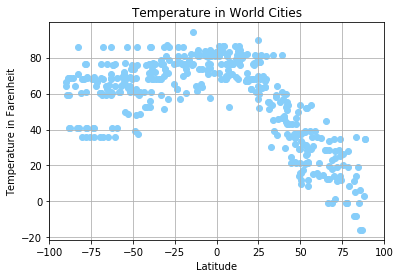

In [28]:
#scatter plot
plt.scatter(cities_filtered_df["lat"], cities_filtered_df["Temp"], marker ="o", color = "lightskyblue")
plt.xlim(-100,100)
plt.title("Temperature in World Cities")
plt.ylabel("Temperature in Farenheit")
plt.xlabel("Latitude")
plt.grid(True)
plt.show 


<function matplotlib.pyplot.show>

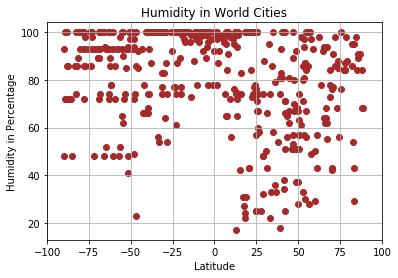

In [29]:
#scatter plot
plt.scatter(cities_filtered_df["lat"], cities_filtered_df["Humidity"], marker ="o", color = "brown")
plt.xlim(-100,100)
plt.title("Humidity in World Cities")
plt.ylabel("Humidity in Percentage")
plt.xlabel("Latitude")
plt.grid(True)
plt.show 


<function matplotlib.pyplot.show>

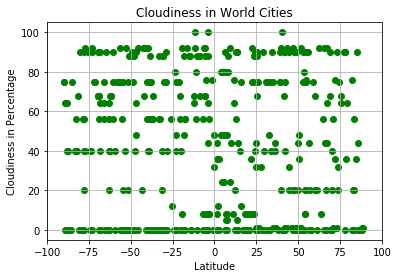

In [30]:
#scatter plot
plt.scatter(cities_filtered_df["lat"], cities_filtered_df["Cloudiness"], marker ="o", color = "green")
plt.xlim(-100,100)
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness in Percentage")
plt.xlabel("Latitude")
plt.grid(True)
plt.show 

<function matplotlib.pyplot.show>

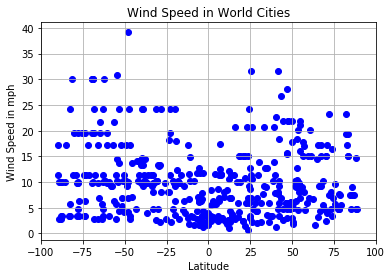

In [31]:
#scatter plot
plt.scatter(cities_filtered_df["lat"], cities_filtered_df["Wind Speed"], marker ="o", color = "blue")
plt.xlim(-100,100)
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed in mph")
plt.xlabel("Latitude")
plt.grid(True)
plt.show 